In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000

In [4]:
def points_xy(k, n):
    x_k = -5 + k * (10 / n)
    y_k = 1 / (1 + x_k ** 2)
    return x_k, y_k

In [5]:
def lagrange_polynom(x, y, t, n):
    p = []
    l_i = lambda t, i: np.prod([(t - x[j]) for j in range(n) if j != i])
    L = lambda t: np.sum([y[i] * l_i(t, i)  / (l_i(x[i], i)) for i in range(n+1)])
    pn = np.sum(np.array(p))
    pn = np.vectorize(L)(t)

    return pn

[]
[]


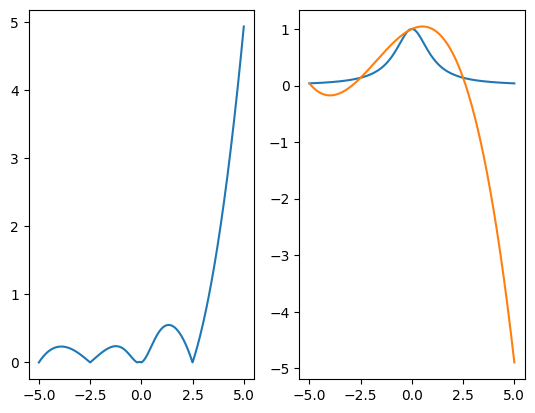

[]
[]


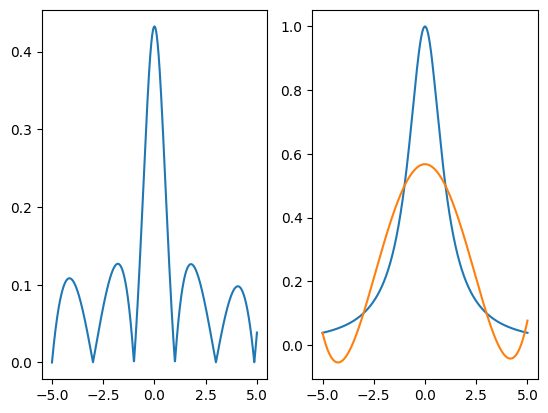

[]
[]


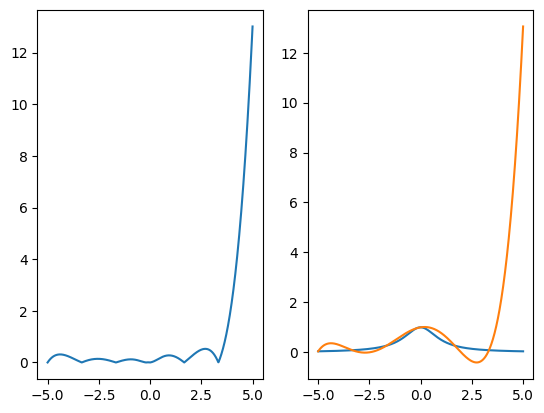

[]
[]


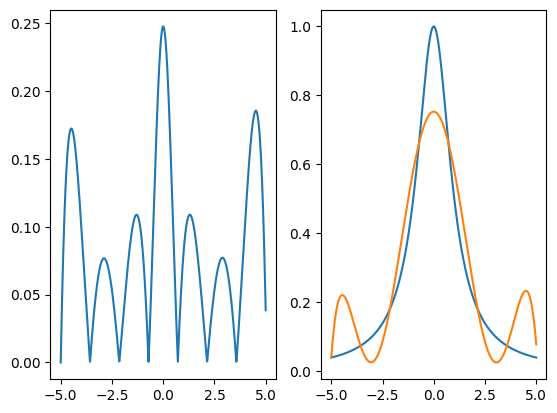

[]
[]


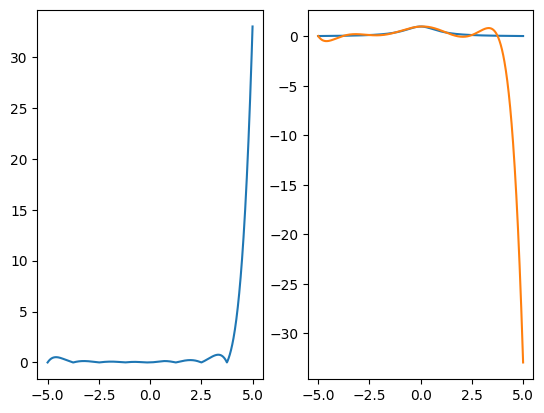

[]
[]


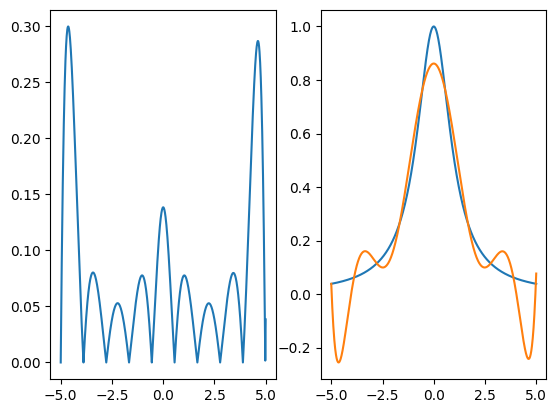

[]
[]


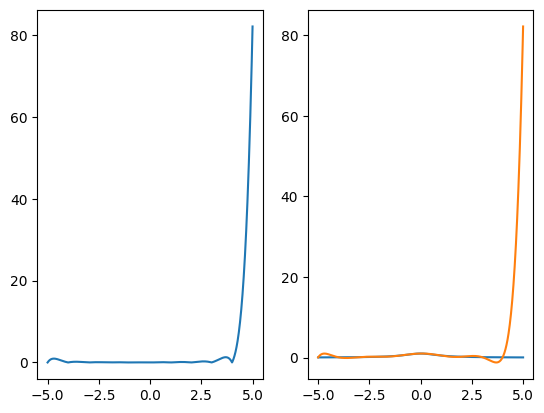

[]
[]


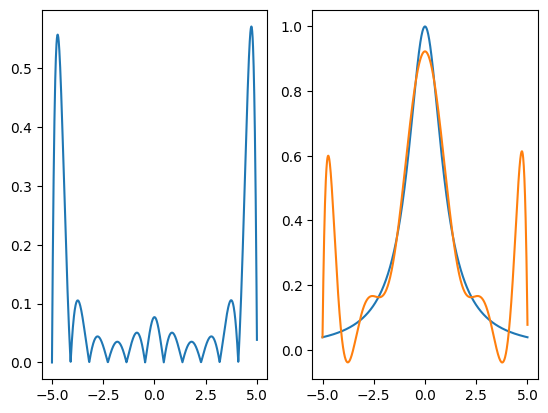

[]
[]


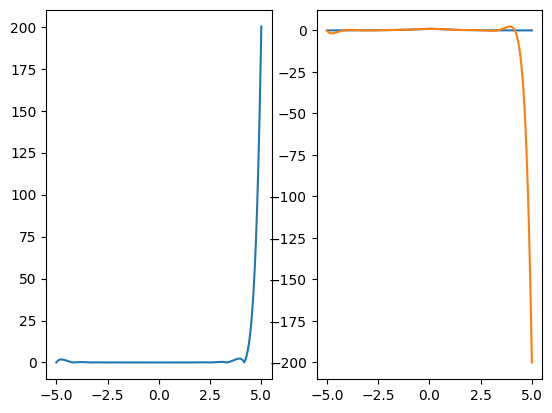

[]
[]


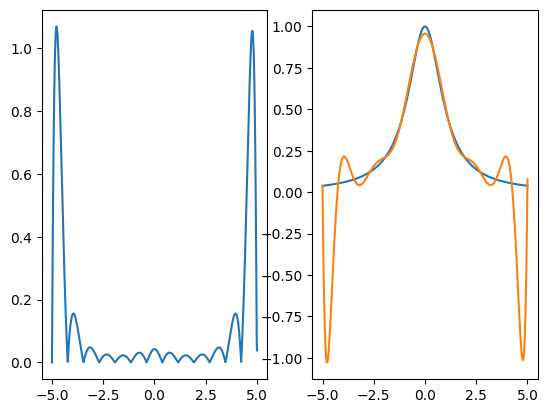

[]
[]


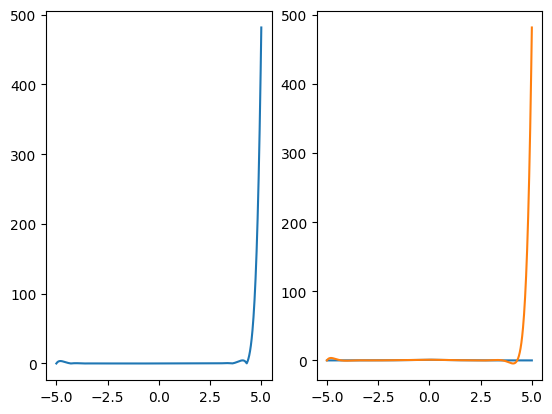

[]
[]


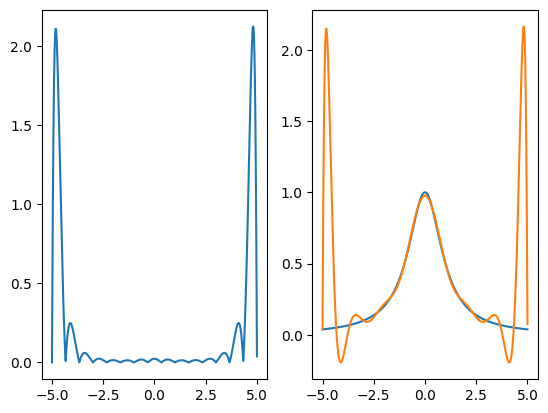

In [32]:
for n in range(4, 16):
    x = np.array([points_xy(i, n)[0] for i in range(n+1)])
    y = np.array([points_xy(i, n)[1] for i in range(n+1)])
    t = np.linspace(x[0], x[-1], N)
    plt.subplot(1,2,1)
    plt.plot(t, np.abs(lagrange_polynom(x, y, t, n) - np.vectorize(lambda x: 1 / (1 + x ** 2))(t)))
    plt.subplot(1,2,2)
    plt.plot(t, np.vectorize(lambda x: 1 / (1 + x ** 2))(t))
    plt.plot(t, lagrange_polynom(x,y,t,n))
    plt.show()

In [6]:
def coefficients(x, y):
    n = len(x)
    a = np.copy(y)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])
    return np.array(a)

def Newton_polynom(X, Y, t):
    a = coefficients(X, Y)
    n = X.size
    res = a[n - 1]
    for i in range(n - 2, -1, -1):
        res = res * (t - X[i]) + a[i]
    return res

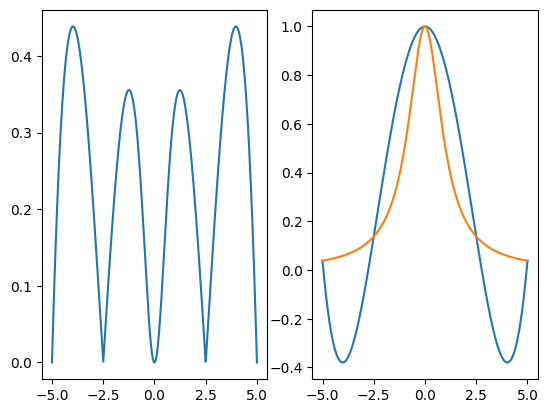

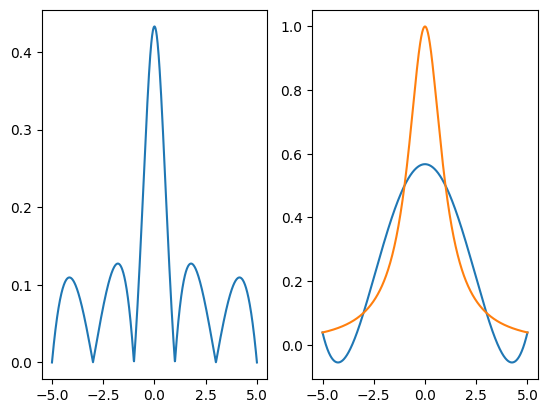

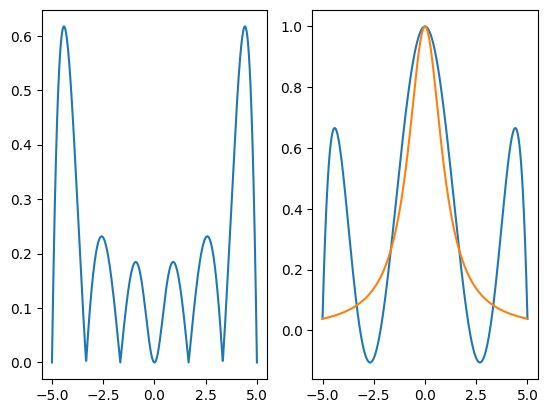

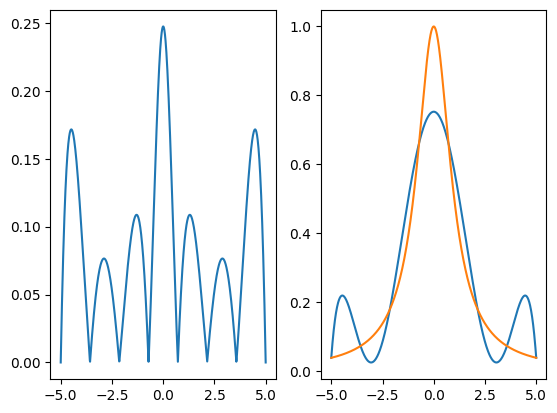

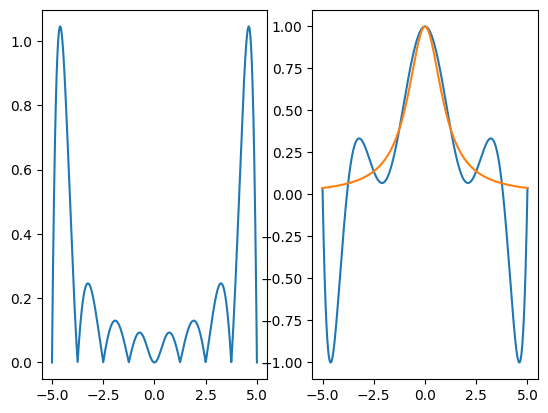

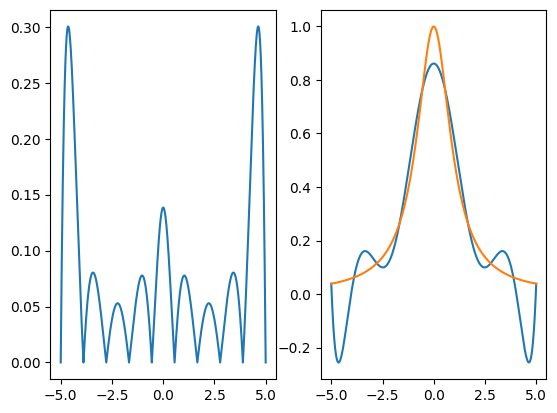

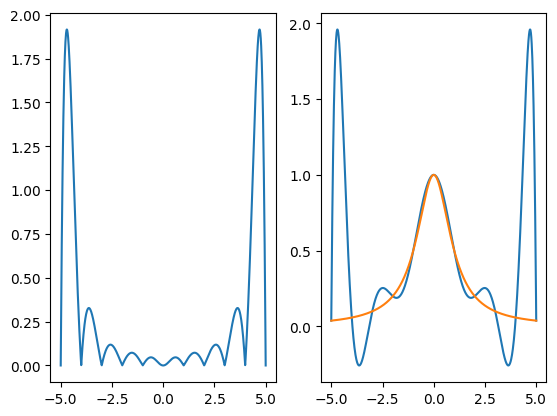

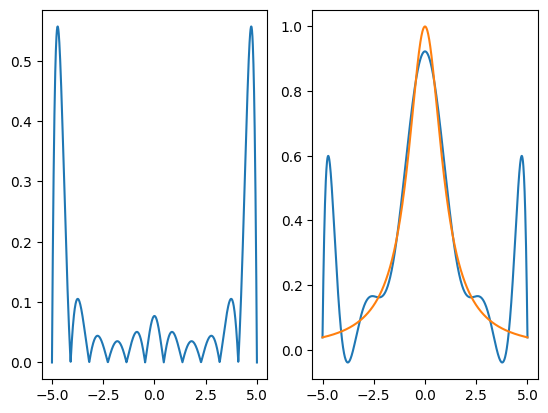

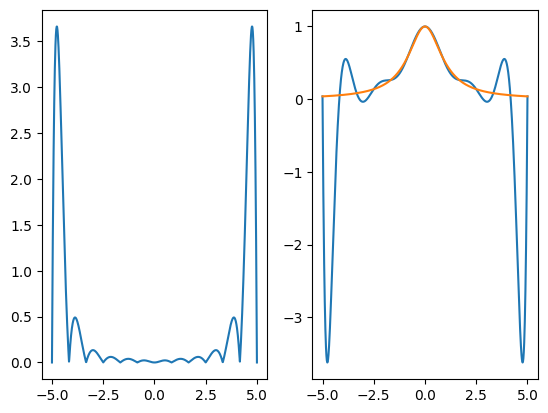

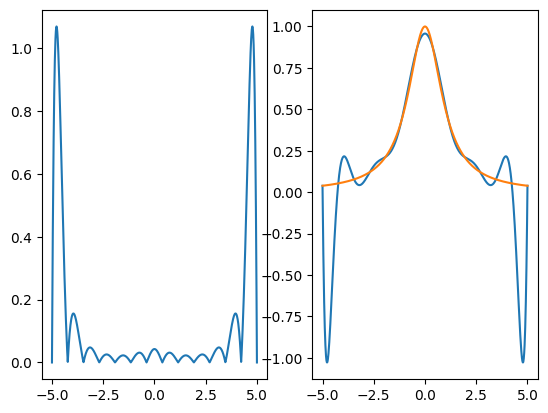

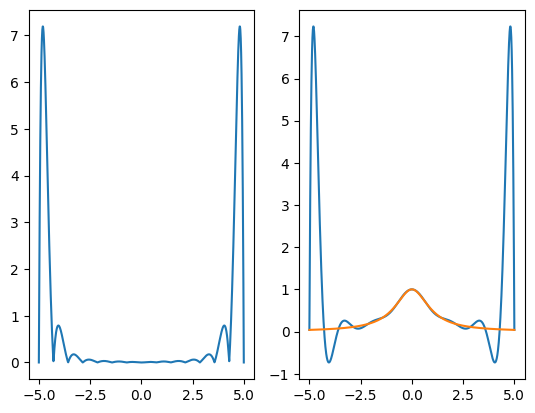

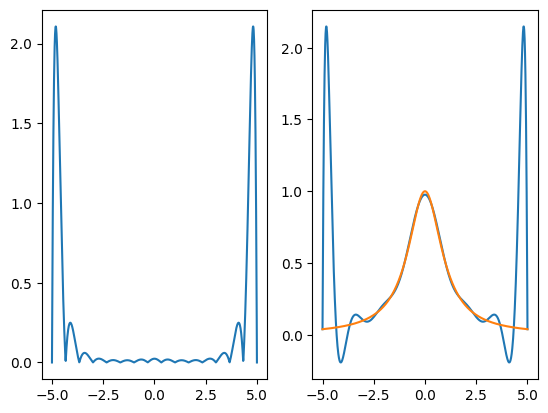

In [8]:
for n in range(4, 16):
    x = np.array([points_xy(i, n)[0] for i in range(n+1)])
    y = np.array([points_xy(i, n)[1] for i in range(n+1)])
    t = np.linspace(x[0], x[-1], N)
    plt.subplot(1,2,1)
    plt.plot(t, np.abs(Newton_polynom(x, y, t) - np.vectorize(lambda x: 1 / (1 + x ** 2))(t)))
    plt.subplot(1,2,2)
    plt.plot(t, Newton_polynom(x, y, t))
    plt.plot(t, np.vectorize(lambda x: 1 / (1 + x ** 2))(t))
    plt.show()